# Email Pre-processing Pipeline [WIP]

## Section 1: Introduction

The goal of this notebook is to show how you can turn a notebook into an API.

In [3]:
import os

def get_filename(directory, filename):
    cwd = os.getcwd()
    local_directory = os.path.join(os.path.split(cwd)[0], directory)
    ci_directory = os.path.join(cwd, directory)

    if os.path.exists(local_directory) and filename in os.listdir(local_directory):
        return os.path.join(local_directory, filename)
    elif os.path.exists(ci_directory) and filename in os.listdir(ci_directory):
        return os.path.join(ci_directory, filename)
    else:
        raise FileNotFoundError

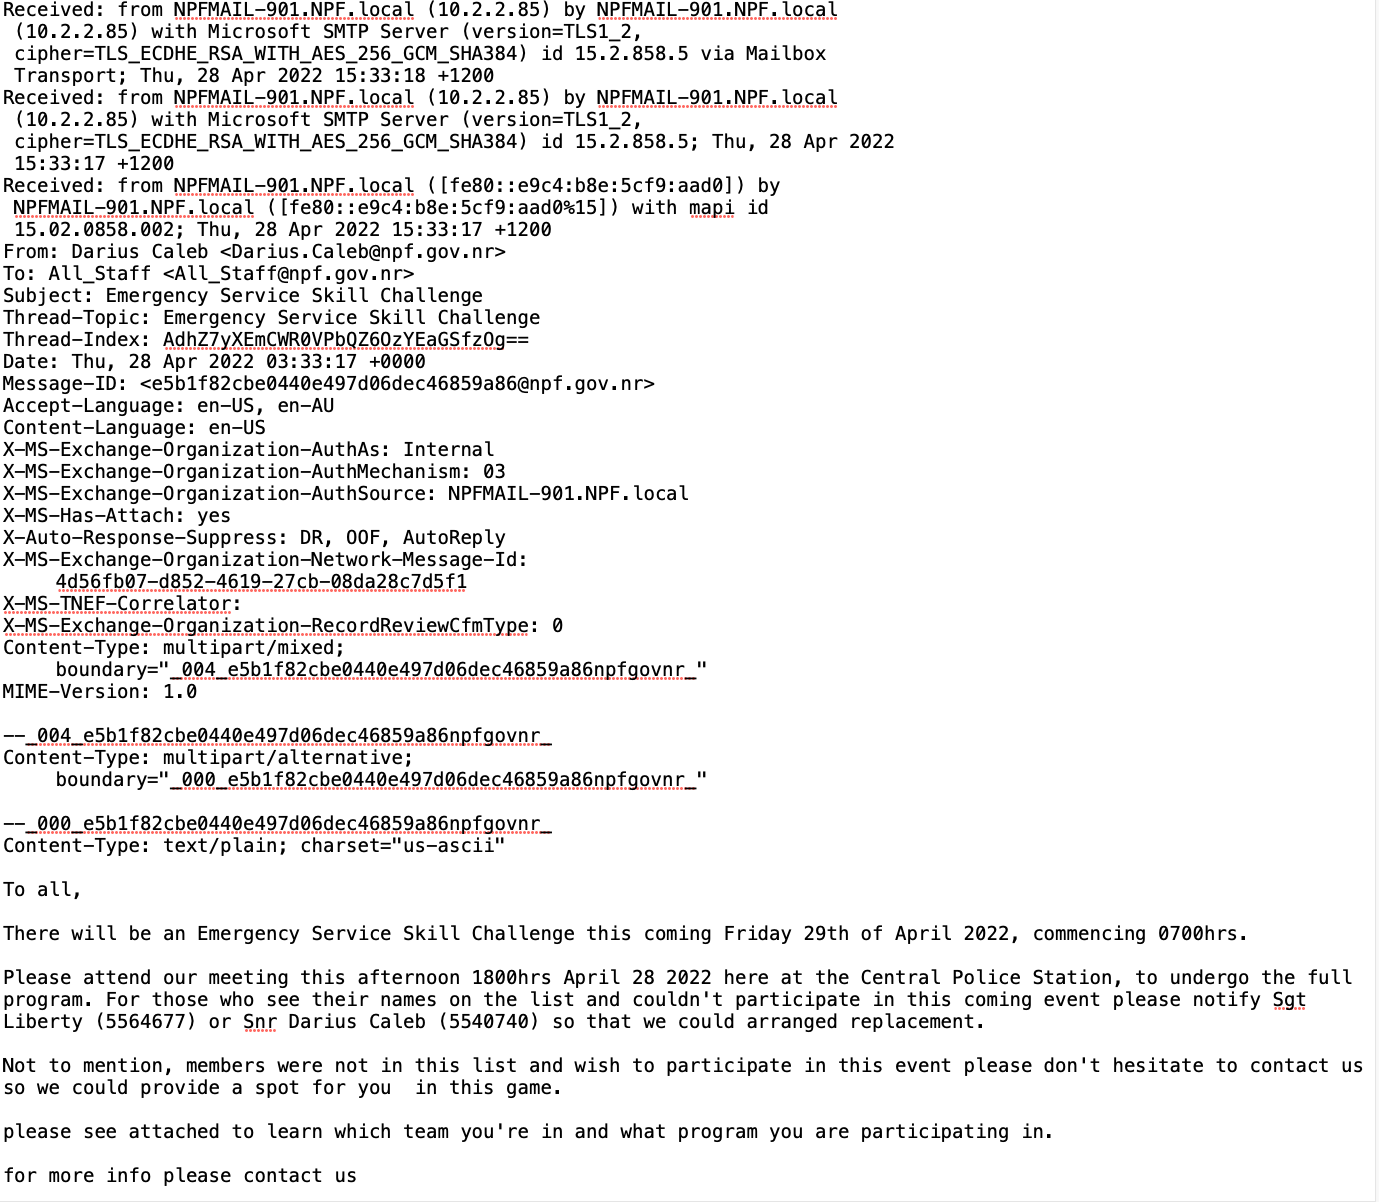

In [4]:
from IPython.display import Image

sample_image = get_filename("img", "email-screenshot.png")
Image(filename=sample_image) 

## Section 2: Partitioning Brick

In [5]:
from typing import Dict, List, Text

from email import policy
from email.parser import BytesParser
from email.message import EmailMessage

def read_email(filename: Text) -> EmailMessage:
    """Input: `.eml` file
        Return: `email.message.EmailMessage`
    """
    with open(sample_email, 'rb') as fp:
        msg = BytesParser(policy=policy.default).parse(fp)
    fp.close()
    return msg

# Get file path
sample_email = get_filename("sample-docs", "1.eml")
msg = read_email(sample_email)

In [6]:
sample_email

'/Users/mallori/pipeline-emails/sample-docs/1.eml'

In [7]:
msg

In [12]:
def get_header(email_message_object: EmailMessage) -> List[Text]:
    hdr = []
    hdr.append("To: " + email_message_object['To'])
    hdr.append("From: " + email_message_object['From'])
    hdr.append("Subject: " + email_message_object['Subject'])
    return hdr
    
def get_body(email_message_object: EmailMessage) -> Text:
    text = email_message_object.get_body(preferencelist=('plain')).get_content()
    return text

In [13]:
header = get_header(msg)

In [14]:
print(header)

['To: All_Staff <All_Staff@npf.gov.nr>', 'From: Darius Caleb <Darius.Caleb@npf.gov.nr>', 'Subject: Emergency Service Skill Challenge ']


In [20]:
import io
import csv
from typing import Dict, List

from unstructured.documents.elements import Text, NarrativeText, Title, ListItem

def eml_to_elements(filepath: Text) -> List[Text]:
    elements: List[Text] = list()
        
    email = []
    with open(sample_email, 'rb') as fp:
        msg = BytesParser(policy=policy.default).parse(fp)
    fp.close()
    
    header = get_header(msg)
    
    for item in header:
        if "To" in item:
            elements.append(Title(text=item))
        elif "From" in item:
            elements.append(Title(text=item))
        else:
            elements.append(Title(text=item))
    
    elements.append(NarrativeText(text=get_body(msg)))
    return elements

In [21]:
email = eml_to_elements(sample_email)

In [23]:
email[3].text

"To all,\n\nThere will be an Emergency Service Skill Challenge this coming Friday 29th of April 2022, commencing 0700hrs.\n\nPlease attend our meeting this afternoon 1800hrs April 28 2022 here at the Central Police Station, to undergo the full program. For those who see their names on the list and couldn't participate in this coming event please notify Sgt Liberty (5564677) or Snr Darius Caleb (5540740) so that we could arranged replacement.\n\nNot to mention, members were not in this list and wish to participate in this event please don't hesitate to contact us so we could provide a spot for you  in this game.\n\nplease see attached to learn which team you're in and what program you are participating in.\n\nfor more info please contact us\n\nMa Tubwa.\n"

## Section 3: Cleaning Bricks

In [24]:
from unstructured.cleaners.core import clean_extra_whitespace

clean_extra_whitespace(email[3].text)

"To all, There will be an Emergency Service Skill Challenge this coming Friday 29th of April 2022, commencing 0700hrs. Please attend our meeting this afternoon 1800hrs April 28 2022 here at the Central Police Station, to undergo the full program. For those who see their names on the list and couldn't participate in this coming event please notify Sgt Liberty (5564677) or Snr Darius Caleb (5540740) so that we could arranged replacement. Not to mention, members were not in this list and wish to participate in this event please don't hesitate to contact us so we could provide a spot for you in this game. please see attached to learn which team you're in and what program you are participating in. for more info please contact us Ma Tubwa."